# House Price Prediction

In [1]:
#Import necessary packages 
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn import metrics

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam

warnings.filterwarnings("ignore")

# Preprossing of data

In [2]:
data = pd.read_csv('train.csv')

In [3]:
print("data shape ", data.shape)

data shape  (1460, 81)


In [4]:
for elm in data.columns:
    if data[elm].dtype == 'object':
        if data[elm].isnull().sum() != 0:
            print(elm, data[elm].isnull().sum())
    

Alley 1369
MasVnrType 8
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinType2 38
Electrical 1
FireplaceQu 690
GarageType 81
GarageFinish 81
GarageQual 81
GarageCond 81
PoolQC 1453
Fence 1179
MiscFeature 1406


In [5]:
data = data.drop(["Id", "Alley", "MiscFeature", "Fence", "PoolQC", "FireplaceQu"], axis = 1)

In [6]:
for elm in data.columns:
    if data[elm].dtype == 'object':
        if data[elm].isnull().sum() != 0:
            data[elm] = data[elm].fillna(data[elm].value_counts().idxmax())
    else:
        if data[elm].isnull().sum() != 0:
            data[elm] = data[elm].fillna(int(np.mean(data[elm])))
            pass
        pass
    pass
pass

In [7]:
numerical_features   = list()
categorical_features = list()
for elm in data.columns:
    if data[elm].dtype == 'object':
        print(elm," ",data[elm].unique())
        categorical_features.append(elm)
    else:
        numerical_features.append(elm)
        pass
    pass
pass

MSZoning   ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street   ['Pave' 'Grvl']
LotShape   ['Reg' 'IR1' 'IR2' 'IR3']
LandContour   ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities   ['AllPub' 'NoSeWa']
LotConfig   ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope   ['Gtl' 'Mod' 'Sev']
Neighborhood   ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1   ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2   ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType   ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle   ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle   ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl   ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
Exterior1st   ['VinylSd' 'Meta

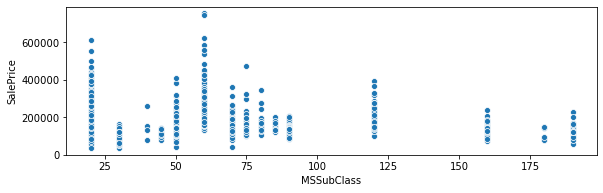

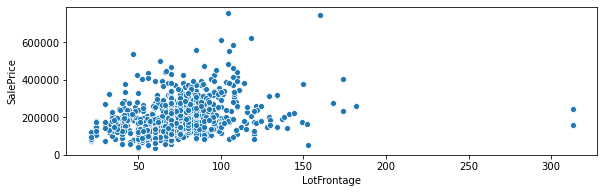

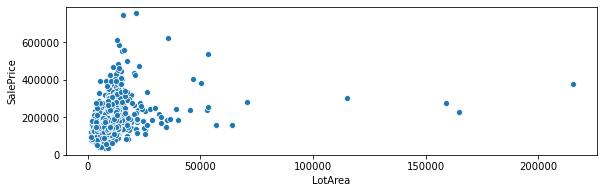

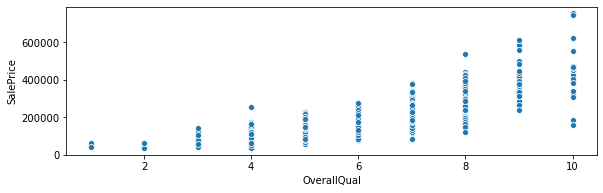

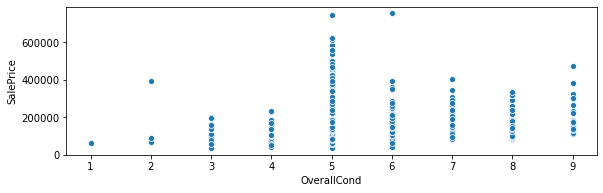

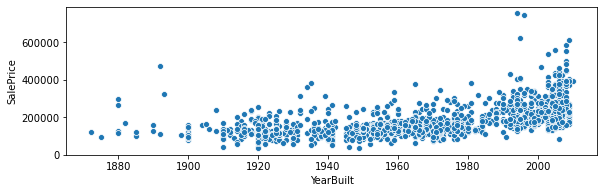

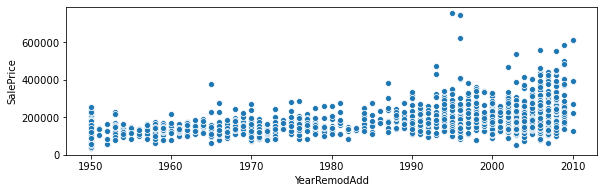

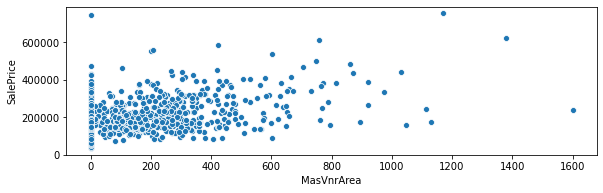

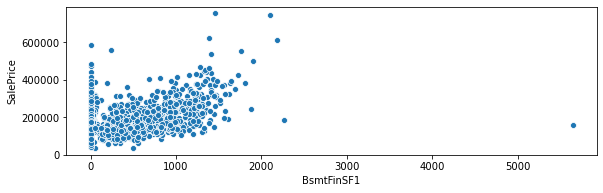

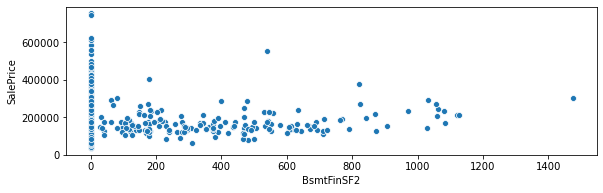

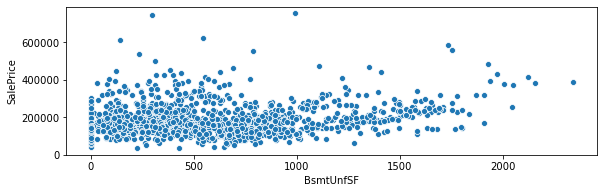

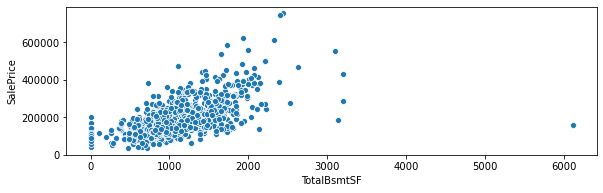

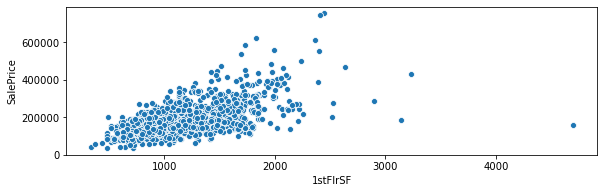

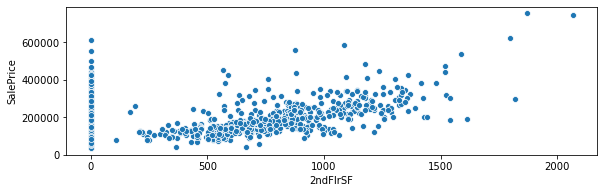

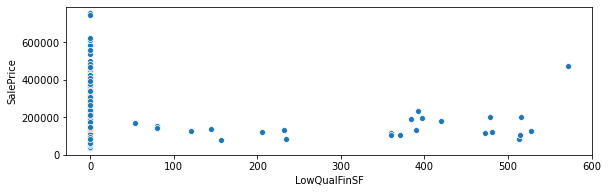

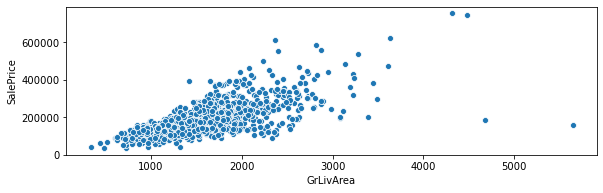

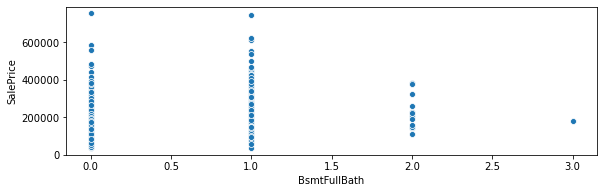

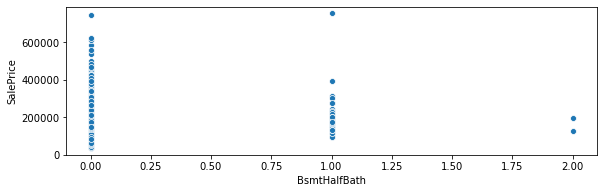

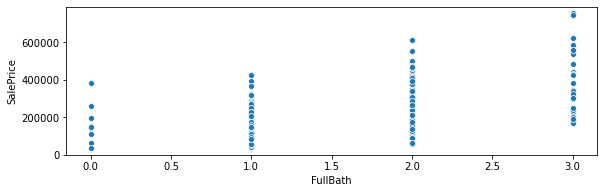

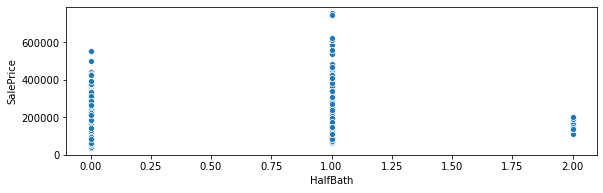

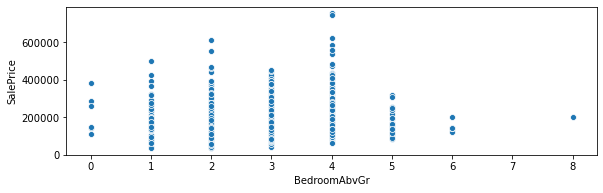

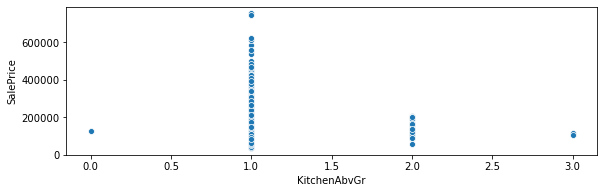

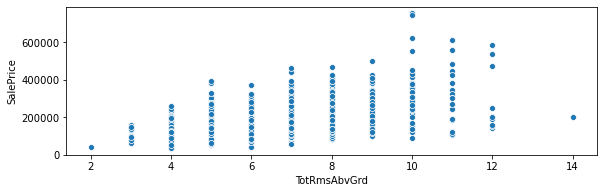

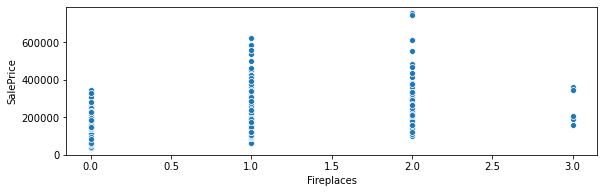

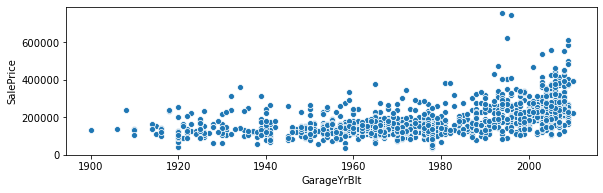

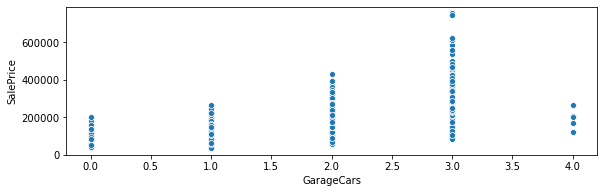

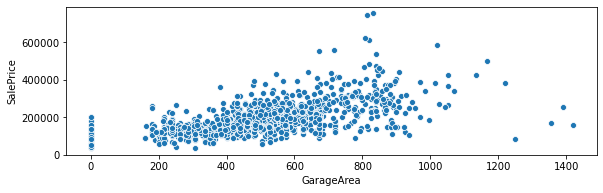

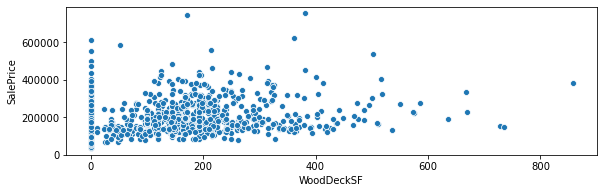

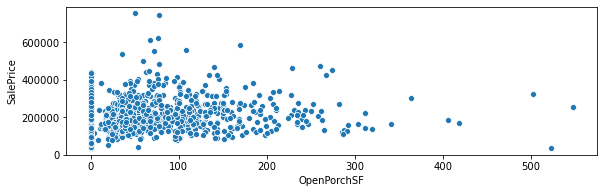

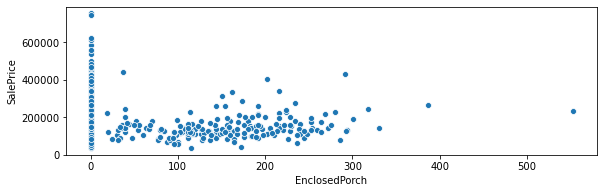

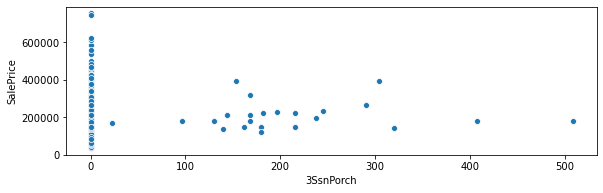

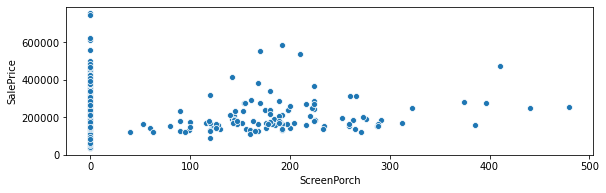

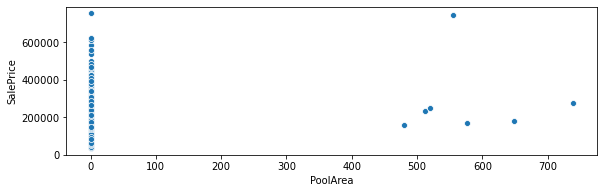

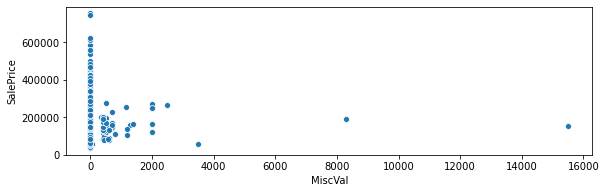

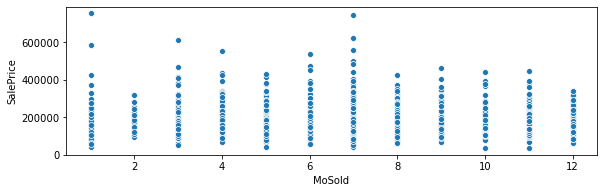

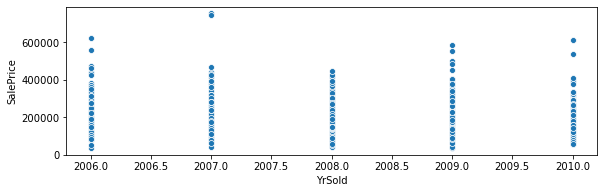

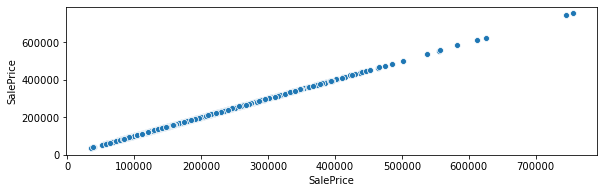

In [8]:
for elm in numerical_features:
    fig = plt.figure(figsize=(16,5))
    fig.add_subplot(2,2,1)
    sns.scatterplot(data[elm], data['SalePrice'])
    plt.tight_layout()
    pass
pass

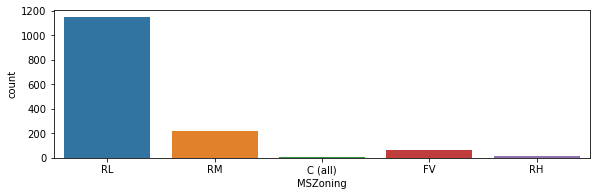

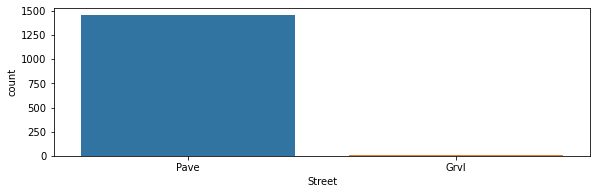

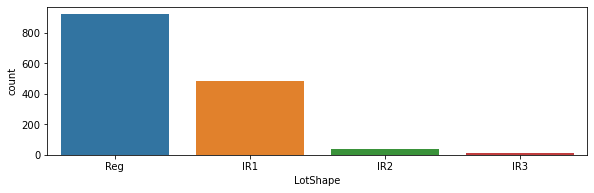

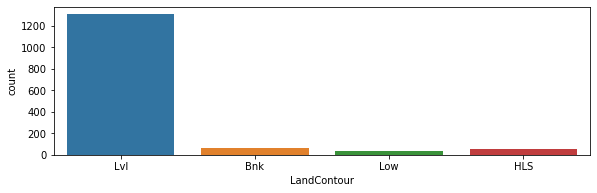

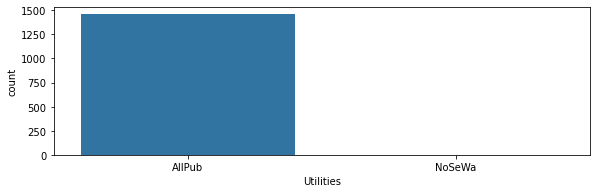

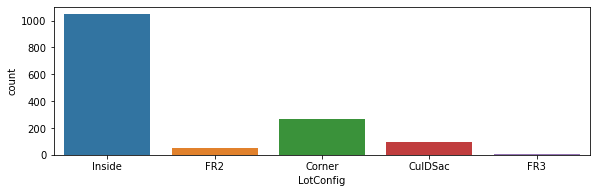

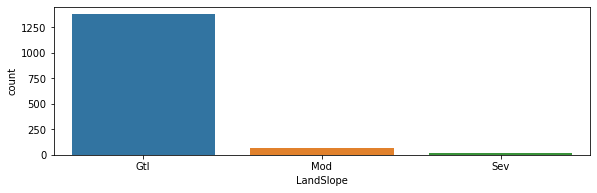

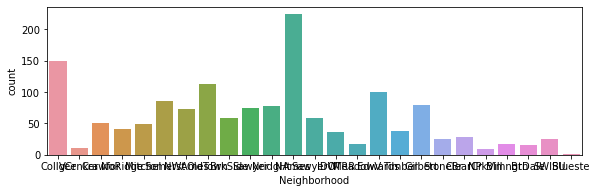

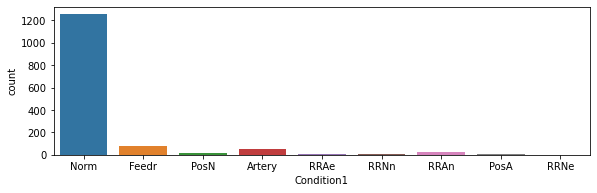

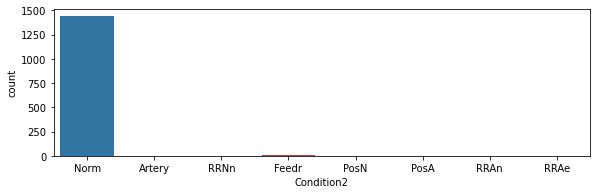

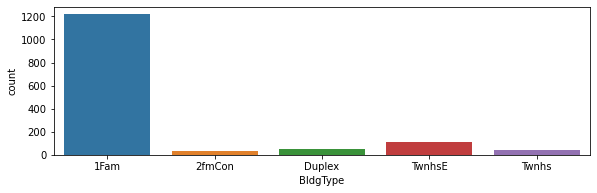

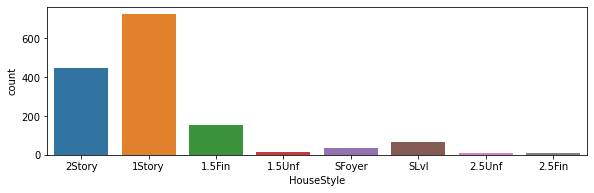

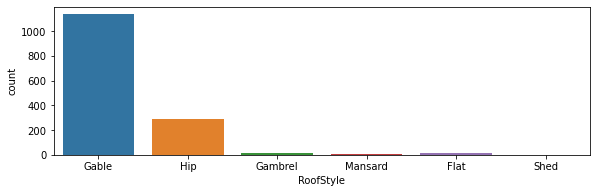

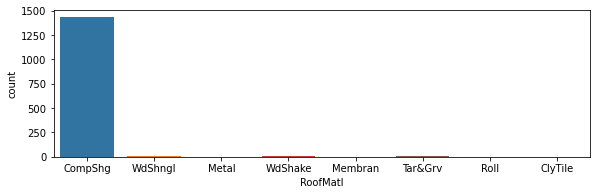

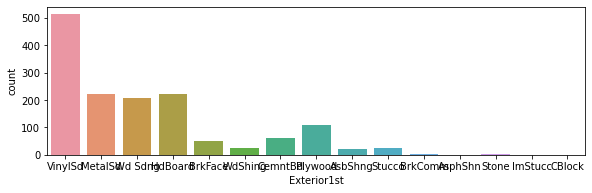

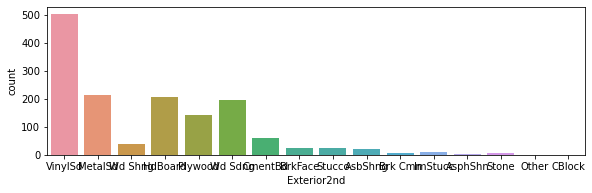

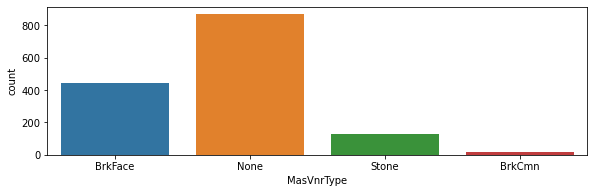

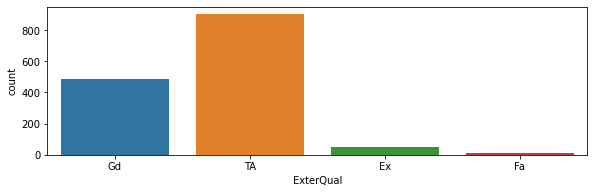

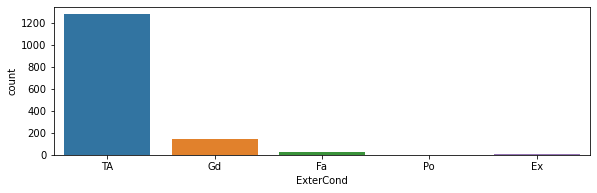

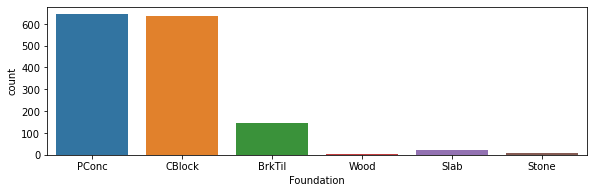

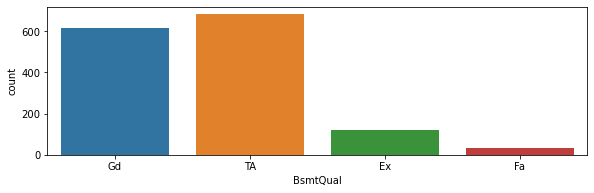

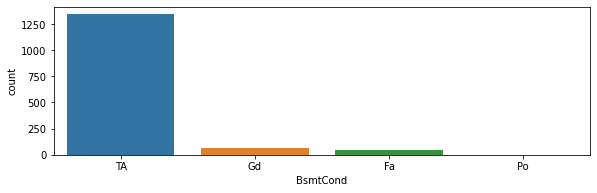

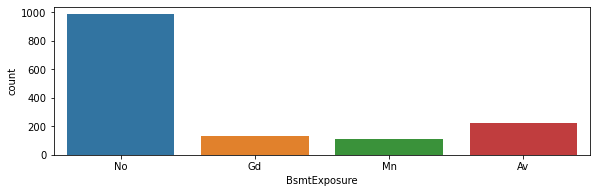

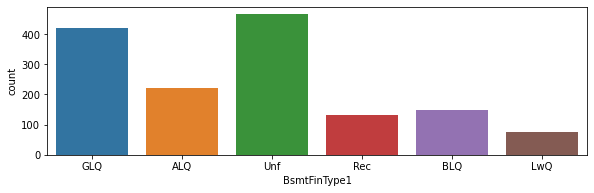

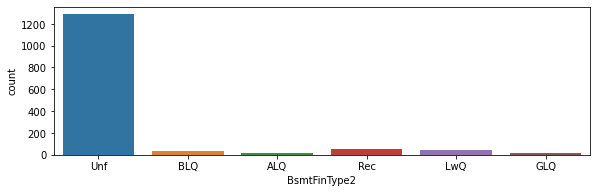

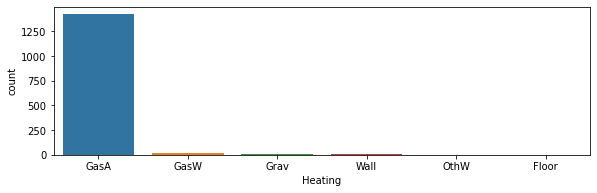

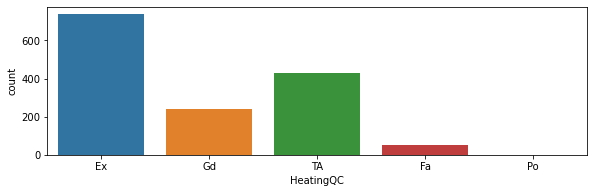

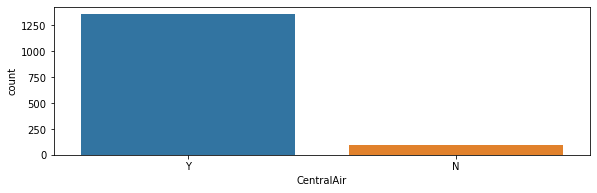

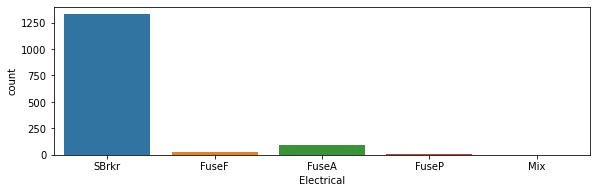

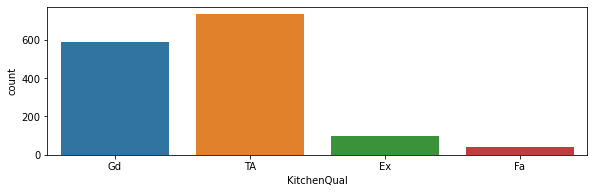

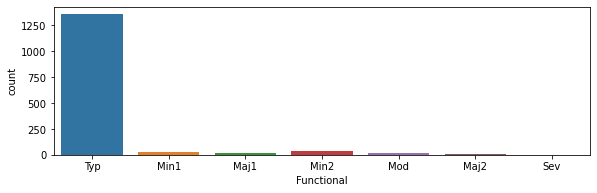

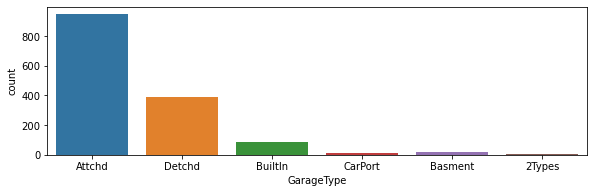

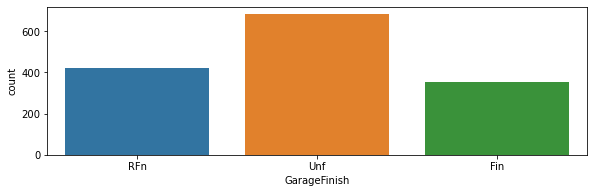

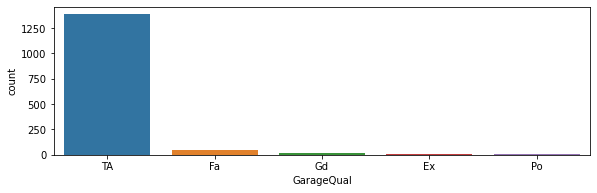

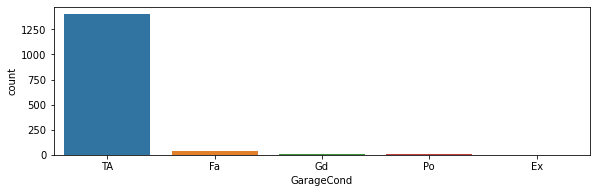

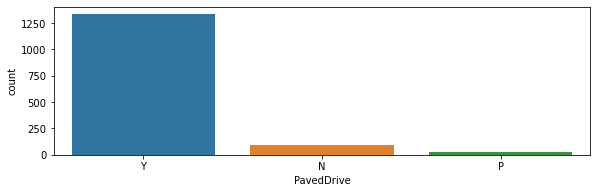

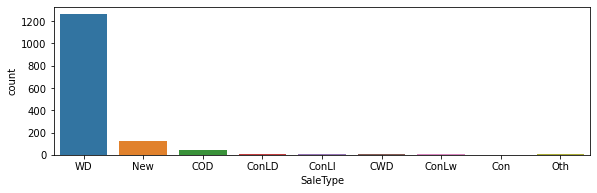

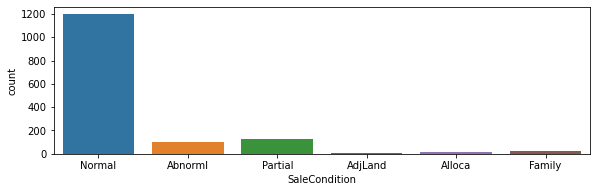

In [9]:
for elm in categorical_features:
    fig = plt.figure(figsize=(16,5))
    fig.add_subplot(2,2,1)
    sns.countplot(data[elm])
    plt.tight_layout()
    pass
pass

In [10]:
features = ['LotArea', 'YearBuilt', 'YearRemodAdd'
           , 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea']

In [11]:
from scipy import stats
outliers_values = list()
for elm in features:
    z = np.abs(stats.zscore(data[elm]))
    threshold = 3
    l = list(np.where(z > 3))
    print(l)
    pass
pass

[array([  53,  249,  313,  335,  384,  451,  457,  661,  706,  769,  848,
       1298, 1396], dtype=int64)]
[array([ 304,  630,  747, 1132, 1137, 1349], dtype=int64)]
[array([], dtype=int64)]
[array([ 137,  224,  278,  477,  496,  581,  678,  774,  798,  932, 1267],
      dtype=int64)]
[array([ 224,  332,  440,  496,  523,  691, 1044, 1182, 1298, 1373],
      dtype=int64)]
[array([ 224,  440,  496,  523,  529,  691,  898, 1024, 1044, 1182, 1298,
       1373], dtype=int64)]
[array([ 304,  691, 1169, 1182], dtype=int64)]
[array([  51,   88,  125,  170,  185,  197,  198,  263,  267,  406,  589,
        635,  729,  873,  883, 1009, 1031, 1173, 1349, 1440], dtype=int64)]
[array([ 118,  185,  197,  304,  496,  523,  608,  635,  691,  769,  798,
       1169, 1182, 1268, 1298, 1353], dtype=int64)]


In [12]:
values = [53,  249,  313,  335,  384,  451,  457,  661,  706,  769,  848,
       1298, 1396, 304,  630,  747, 1132, 1137, 1349, 137,  224,  278,  477,  496,  581,  678,  774,  798,  932, 1267
         , 224,  332,  440,  496,  523,  691, 1044, 1182, 1298, 1373, 224,  440,  496,  523,  529,  691,  898, 1024, 1044, 1182, 1298,
       1373, 304,  691, 1169, 1182,1,   88,  125,  170,  185,  197,  198,  263,  267,  406,  589,
        635,  729,  873,  883, 1009, 1031, 1173, 1349, 1440, 118,  185,  197,  304,  496,  523,  608,  635,  691,  769,  798,
       1169, 1182, 1268, 1298, 1353 ]

In [13]:
outlier_values = list(set(values))

In [14]:
data1 = data.drop(index = outlier_values)

In [15]:
print("the new shape of data", data1.shape)

the new shape of data (1396, 75)


In [16]:
X = data1[features]
y = data1['SalePrice']

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

# Regression using numerical values 

# Linear Regression model

In [18]:
from sklearn.preprocessing import StandardScaler
import numpy as np
s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train.astype(np.float))
X_test = s_scaler.transform(X_test.astype(np.float))

In [19]:
Linear_Regression = LinearRegression()
Linear_Regression.fit(X_train, y_train)

LinearRegression()

In [20]:
print(Linear_Regression.intercept_)
print(Linear_Regression.coef_)

175769.987888993
[ 5.37605131e+03  1.64730089e+04  1.23213626e+04 -8.35908140e+03
  2.21145848e+04 -1.13047309e+18 -1.39857849e+18 -1.41235403e+16
  1.51755965e+18]


In [21]:
y_pred = Linear_Regression.predict(X_test)

coeff_df = pd.DataFrame({"features" : features, "Coefficient" : Linear_Regression.coef_ }) 
coeff_df

,features,Coefficient
0,LotArea,5.376051e+03
1,YearBuilt,1.647301e+04
2,YearRemodAdd,1.232136e+04
3,BsmtUnfSF,-8.359081e+03
4,TotalBsmtSF,2.211458e+04
5,1stFlrSF,-1.130473e+18
6,2ndFlrSF,-1.398578e+18
7,LowQualFinSF,-1.412354e+16
8,GrLivArea,1.517560e+18


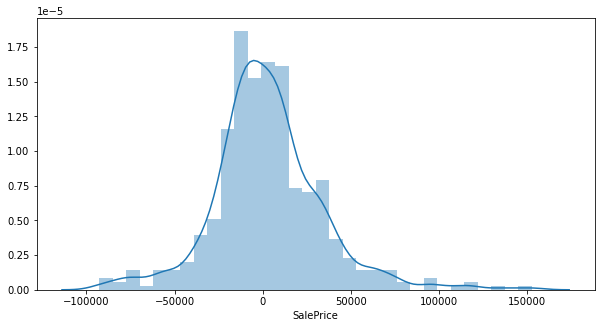

In [22]:
fig = plt.figure(figsize=(10,5))
residuals = (y_test- y_pred)
sns.distplot(residuals)

In [23]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))

MAE: 22437.80495613243
MSE: 995251257.7861993
RMSE: 31547.603043435793
VarScore: 0.798465133051714


# Keras Sequential model 

In [24]:
def build_model(dense_dimension = 200):
    model = Sequential()
    model.add(Dense(dense_dimension,  activation='relu'))
    model.add(Dense(dense_dimension,  activation='relu'))
    model.add(Dense(dense_dimension, activation='relu'))
    model.add(Dense(dense_dimension, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='Adam',loss='mean_squared_error')
    return model

In [25]:
model = build_model(200)
history = model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=200,epochs=2000)
model.summary()

Epoch 1/2000
5/5 [==============================] - 1s 118ms/step - loss: 35712864256.0000 - val_loss: 36218933248.0000
Epoch 2/2000
5/5 [==============================] - 0s 48ms/step - loss: 35712032768.0000 - val_loss: 36217319424.0000
Epoch 3/2000
5/5 [==============================] - 0s 48ms/step - loss: 35709784064.0000 - val_loss: 36212924416.0000
Epoch 4/2000
5/5 [==============================] - 0s 46ms/step - loss: 35703779328.0000 - val_loss: 36201938944.0000
Epoch 5/2000
5/5 [==============================] - 0s 45ms/step - loss: 35689537536.0000 - val_loss: 36177190912.0000
Epoch 6/2000
5/5 [==============================] - 0s 43ms/step - loss: 35658366976.0000 - val_loss: 36126244864.0000
Epoch 7/2000
5/5 [==============================] - 0s 47ms/step - loss: 35595739136.0000 - val_loss: 36028477440.0000
Epoch 8/2000
5/5 [==============================] - 0s 47ms/step - loss: 35479011328.0000 - val_loss: 35850928128.0000
Epoch 9/2000
5/5 [=============================

5/5 [==============================] - 0s 8ms/step - loss: 1093843200.0000 - val_loss: 1010177856.0000
Epoch 71/2000
5/5 [==============================] - 0s 7ms/step - loss: 1088165632.0000 - val_loss: 1004262912.0000
Epoch 72/2000
5/5 [==============================] - 0s 8ms/step - loss: 1083285888.0000 - val_loss: 1001884864.0000
Epoch 73/2000
5/5 [==============================] - 0s 7ms/step - loss: 1077871488.0000 - val_loss: 995562368.0000
Epoch 74/2000
5/5 [==============================] - 0s 7ms/step - loss: 1074750080.0000 - val_loss: 992455424.0000
Epoch 75/2000
5/5 [==============================] - 0s 9ms/step - loss: 1067520960.0000 - val_loss: 993335552.0000
Epoch 76/2000
5/5 [==============================] - 0s 7ms/step - loss: 1063359872.0000 - val_loss: 991498496.0000
Epoch 77/2000
5/5 [==============================] - 0s 7ms/step - loss: 1059220864.0000 - val_loss: 986483328.0000
Epoch 78/2000
5/5 [==============================] - 0s 8ms/step - loss: 1055404992

Epoch 141/2000
5/5 [==============================] - 0s 7ms/step - loss: 855540544.0000 - val_loss: 851022848.0000
Epoch 142/2000
5/5 [==============================] - 0s 7ms/step - loss: 848876736.0000 - val_loss: 847454144.0000
Epoch 143/2000
5/5 [==============================] - 0s 7ms/step - loss: 848374144.0000 - val_loss: 844766144.0000
Epoch 144/2000
5/5 [==============================] - 0s 7ms/step - loss: 847065536.0000 - val_loss: 848530816.0000
Epoch 145/2000
5/5 [==============================] - 0s 7ms/step - loss: 845411200.0000 - val_loss: 851122688.0000
Epoch 146/2000
5/5 [==============================] - 0s 7ms/step - loss: 841949760.0000 - val_loss: 847281792.0000
Epoch 147/2000
5/5 [==============================] - 0s 7ms/step - loss: 840369856.0000 - val_loss: 841403456.0000
Epoch 148/2000
5/5 [==============================] - 0s 7ms/step - loss: 840384512.0000 - val_loss: 836740352.0000
Epoch 149/2000
5/5 [==============================] - 0s 7ms/step - loss

5/5 [==============================] - 0s 7ms/step - loss: 763774144.0000 - val_loss: 816796160.0000
Epoch 212/2000
5/5 [==============================] - 0s 7ms/step - loss: 762802112.0000 - val_loss: 819037568.0000
Epoch 213/2000
5/5 [==============================] - 0s 6ms/step - loss: 762322048.0000 - val_loss: 821502016.0000
Epoch 214/2000
5/5 [==============================] - 0s 6ms/step - loss: 760764544.0000 - val_loss: 815943552.0000
Epoch 215/2000
5/5 [==============================] - 0s 6ms/step - loss: 760231552.0000 - val_loss: 817756352.0000
Epoch 216/2000
5/5 [==============================] - 0s 6ms/step - loss: 762288896.0000 - val_loss: 811803840.0000
Epoch 217/2000
5/5 [==============================] - 0s 6ms/step - loss: 760343360.0000 - val_loss: 815368128.0000
Epoch 218/2000
5/5 [==============================] - 0s 7ms/step - loss: 756980480.0000 - val_loss: 814354752.0000
Epoch 219/2000
5/5 [==============================] - 0s 8ms/step - loss: 758062016.000

Epoch 282/2000
5/5 [==============================] - 0s 6ms/step - loss: 716856256.0000 - val_loss: 804599424.0000
Epoch 283/2000
5/5 [==============================] - 0s 6ms/step - loss: 715539904.0000 - val_loss: 806836288.0000
Epoch 284/2000
5/5 [==============================] - 0s 6ms/step - loss: 715932224.0000 - val_loss: 807296320.0000
Epoch 285/2000
5/5 [==============================] - 0s 6ms/step - loss: 715511808.0000 - val_loss: 810061504.0000
Epoch 286/2000
5/5 [==============================] - 0s 6ms/step - loss: 715848128.0000 - val_loss: 804675648.0000
Epoch 287/2000
5/5 [==============================] - 0s 7ms/step - loss: 714669248.0000 - val_loss: 802795456.0000
Epoch 288/2000
5/5 [==============================] - 0s 7ms/step - loss: 714989248.0000 - val_loss: 802229568.0000
Epoch 289/2000
5/5 [==============================] - 0s 7ms/step - loss: 712200640.0000 - val_loss: 801074304.0000
Epoch 290/2000
5/5 [==============================] - 0s 7ms/step - loss

5/5 [==============================] - 0s 7ms/step - loss: 685730880.0000 - val_loss: 808722368.0000
Epoch 353/2000
5/5 [==============================] - 0s 7ms/step - loss: 691728512.0000 - val_loss: 803066560.0000
Epoch 354/2000
5/5 [==============================] - 0s 7ms/step - loss: 686216448.0000 - val_loss: 805136064.0000
Epoch 355/2000
5/5 [==============================] - 0s 7ms/step - loss: 687050560.0000 - val_loss: 800635712.0000
Epoch 356/2000
5/5 [==============================] - 0s 7ms/step - loss: 685360192.0000 - val_loss: 798291200.0000
Epoch 357/2000
5/5 [==============================] - 0s 7ms/step - loss: 688034496.0000 - val_loss: 792212160.0000
Epoch 358/2000
5/5 [==============================] - 0s 7ms/step - loss: 685790592.0000 - val_loss: 797684736.0000
Epoch 359/2000
5/5 [==============================] - 0s 7ms/step - loss: 687090688.0000 - val_loss: 799374336.0000
Epoch 360/2000
5/5 [==============================] - 0s 7ms/step - loss: 684318976.000

Epoch 423/2000
5/5 [==============================] - 0s 7ms/step - loss: 663040640.0000 - val_loss: 800240256.0000
Epoch 424/2000
5/5 [==============================] - 0s 7ms/step - loss: 663679296.0000 - val_loss: 799104384.0000
Epoch 425/2000
5/5 [==============================] - 0s 7ms/step - loss: 662776064.0000 - val_loss: 796154304.0000
Epoch 426/2000
5/5 [==============================] - 0s 7ms/step - loss: 663582912.0000 - val_loss: 792413632.0000
Epoch 427/2000
5/5 [==============================] - 0s 7ms/step - loss: 662411264.0000 - val_loss: 798824000.0000
Epoch 428/2000
5/5 [==============================] - 0s 7ms/step - loss: 663557248.0000 - val_loss: 802685184.0000
Epoch 429/2000
5/5 [==============================] - 0s 7ms/step - loss: 660920512.0000 - val_loss: 801909440.0000
Epoch 430/2000
5/5 [==============================] - 0s 7ms/step - loss: 663547264.0000 - val_loss: 800344704.0000
Epoch 431/2000
5/5 [==============================] - 0s 6ms/step - loss

5/5 [==============================] - 0s 7ms/step - loss: 643796288.0000 - val_loss: 805724160.0000
Epoch 494/2000
5/5 [==============================] - 0s 7ms/step - loss: 645386112.0000 - val_loss: 804156160.0000
Epoch 495/2000
5/5 [==============================] - 0s 7ms/step - loss: 646049152.0000 - val_loss: 810511424.0000
Epoch 496/2000
5/5 [==============================] - 0s 7ms/step - loss: 644603008.0000 - val_loss: 808251008.0000
Epoch 497/2000
5/5 [==============================] - 0s 7ms/step - loss: 644444608.0000 - val_loss: 810282560.0000
Epoch 498/2000
5/5 [==============================] - 0s 7ms/step - loss: 643475008.0000 - val_loss: 811779200.0000
Epoch 499/2000
5/5 [==============================] - 0s 7ms/step - loss: 644438080.0000 - val_loss: 809177984.0000
Epoch 500/2000
5/5 [==============================] - 0s 8ms/step - loss: 641932480.0000 - val_loss: 814748224.0000
Epoch 501/2000
5/5 [==============================] - 0s 7ms/step - loss: 643467904.000

Epoch 564/2000
5/5 [==============================] - 0s 7ms/step - loss: 630663232.0000 - val_loss: 813925440.0000
Epoch 565/2000
5/5 [==============================] - 0s 6ms/step - loss: 629391488.0000 - val_loss: 833655296.0000
Epoch 566/2000
5/5 [==============================] - 0s 6ms/step - loss: 624884032.0000 - val_loss: 818340928.0000
Epoch 567/2000
5/5 [==============================] - 0s 7ms/step - loss: 624921280.0000 - val_loss: 816160320.0000
Epoch 568/2000
5/5 [==============================] - 0s 6ms/step - loss: 623520256.0000 - val_loss: 814237056.0000
Epoch 569/2000
5/5 [==============================] - 0s 6ms/step - loss: 621413888.0000 - val_loss: 814402176.0000
Epoch 570/2000
5/5 [==============================] - 0s 6ms/step - loss: 622895936.0000 - val_loss: 816259840.0000
Epoch 571/2000
5/5 [==============================] - 0s 6ms/step - loss: 624214336.0000 - val_loss: 817009600.0000
Epoch 572/2000
5/5 [==============================] - 0s 7ms/step - loss

5/5 [==============================] - 0s 6ms/step - loss: 601167168.0000 - val_loss: 837607808.0000
Epoch 635/2000
5/5 [==============================] - 0s 7ms/step - loss: 600206848.0000 - val_loss: 837403520.0000
Epoch 636/2000
5/5 [==============================] - 0s 6ms/step - loss: 600022528.0000 - val_loss: 829772352.0000
Epoch 637/2000
5/5 [==============================] - 0s 6ms/step - loss: 599328640.0000 - val_loss: 832580288.0000
Epoch 638/2000
5/5 [==============================] - 0s 7ms/step - loss: 600520128.0000 - val_loss: 830001920.0000
Epoch 639/2000
5/5 [==============================] - 0s 6ms/step - loss: 599481280.0000 - val_loss: 825021952.0000
Epoch 640/2000
5/5 [==============================] - 0s 7ms/step - loss: 599180608.0000 - val_loss: 829311232.0000
Epoch 641/2000
5/5 [==============================] - 0s 7ms/step - loss: 598039680.0000 - val_loss: 833069312.0000
Epoch 642/2000
5/5 [==============================] - 0s 7ms/step - loss: 600366592.000

Epoch 705/2000
5/5 [==============================] - 0s 7ms/step - loss: 576407104.0000 - val_loss: 864164992.0000
Epoch 706/2000
5/5 [==============================] - 0s 7ms/step - loss: 572584064.0000 - val_loss: 864533696.0000
Epoch 707/2000
5/5 [==============================] - 0s 6ms/step - loss: 577116672.0000 - val_loss: 860913600.0000
Epoch 708/2000
5/5 [==============================] - 0s 7ms/step - loss: 572164736.0000 - val_loss: 861727040.0000
Epoch 709/2000
5/5 [==============================] - 0s 7ms/step - loss: 572961088.0000 - val_loss: 864998592.0000
Epoch 710/2000
5/5 [==============================] - 0s 7ms/step - loss: 572050240.0000 - val_loss: 866033856.0000
Epoch 711/2000
5/5 [==============================] - 0s 7ms/step - loss: 571099328.0000 - val_loss: 860077120.0000
Epoch 712/2000
5/5 [==============================] - 0s 6ms/step - loss: 571475200.0000 - val_loss: 857107968.0000
Epoch 713/2000
5/5 [==============================] - 0s 7ms/step - loss

5/5 [==============================] - 0s 6ms/step - loss: 552411200.0000 - val_loss: 901537792.0000
Epoch 776/2000
5/5 [==============================] - 0s 7ms/step - loss: 552895616.0000 - val_loss: 910351488.0000
Epoch 777/2000
5/5 [==============================] - 0s 7ms/step - loss: 553435904.0000 - val_loss: 912680512.0000
Epoch 778/2000
5/5 [==============================] - 0s 7ms/step - loss: 555583936.0000 - val_loss: 914636032.0000
Epoch 779/2000
5/5 [==============================] - 0s 7ms/step - loss: 554732736.0000 - val_loss: 917237312.0000
Epoch 780/2000
5/5 [==============================] - 0s 6ms/step - loss: 555981440.0000 - val_loss: 913843904.0000
Epoch 781/2000
5/5 [==============================] - 0s 7ms/step - loss: 552598976.0000 - val_loss: 911425920.0000
Epoch 782/2000
5/5 [==============================] - 0s 6ms/step - loss: 551659456.0000 - val_loss: 914833664.0000
Epoch 783/2000
5/5 [==============================] - 0s 7ms/step - loss: 549791232.000

Epoch 846/2000
5/5 [==============================] - 0s 7ms/step - loss: 539206400.0000 - val_loss: 958901824.0000
Epoch 847/2000
5/5 [==============================] - 0s 7ms/step - loss: 539335680.0000 - val_loss: 965468928.0000
Epoch 848/2000
5/5 [==============================] - 0s 7ms/step - loss: 536950080.0000 - val_loss: 965727488.0000
Epoch 849/2000
5/5 [==============================] - 0s 6ms/step - loss: 535615776.0000 - val_loss: 964505408.0000
Epoch 850/2000
5/5 [==============================] - 0s 6ms/step - loss: 541054016.0000 - val_loss: 968255168.0000
Epoch 851/2000
5/5 [==============================] - 0s 7ms/step - loss: 538580864.0000 - val_loss: 972598464.0000
Epoch 852/2000
5/5 [==============================] - 0s 7ms/step - loss: 536391168.0000 - val_loss: 972701504.0000
Epoch 853/2000
5/5 [==============================] - 0s 7ms/step - loss: 536972800.0000 - val_loss: 966626624.0000
Epoch 854/2000
5/5 [==============================] - 0s 7ms/step - loss

5/5 [==============================] - 0s 7ms/step - loss: 522227808.0000 - val_loss: 992278720.0000
Epoch 917/2000
5/5 [==============================] - 0s 7ms/step - loss: 521152096.0000 - val_loss: 996340736.0000
Epoch 918/2000
5/5 [==============================] - 0s 7ms/step - loss: 522550848.0000 - val_loss: 997248640.0000
Epoch 919/2000
5/5 [==============================] - 0s 7ms/step - loss: 522858976.0000 - val_loss: 998165056.0000
Epoch 920/2000
5/5 [==============================] - 0s 6ms/step - loss: 523029056.0000 - val_loss: 1002615872.0000
Epoch 921/2000
5/5 [==============================] - 0s 6ms/step - loss: 519244192.0000 - val_loss: 1002647360.0000
Epoch 922/2000
5/5 [==============================] - 0s 6ms/step - loss: 522860864.0000 - val_loss: 1004545728.0000
Epoch 923/2000
5/5 [==============================] - 0s 7ms/step - loss: 522546816.0000 - val_loss: 1006907264.0000
Epoch 924/2000
5/5 [==============================] - 0s 7ms/step - loss: 523284832

5/5 [==============================] - 0s 7ms/step - loss: 512700672.0000 - val_loss: 1047278528.0000
Epoch 987/2000
5/5 [==============================] - 0s 7ms/step - loss: 511484448.0000 - val_loss: 1047457344.0000
Epoch 988/2000
5/5 [==============================] - 0s 7ms/step - loss: 507362624.0000 - val_loss: 1049348224.0000
Epoch 989/2000
5/5 [==============================] - 0s 7ms/step - loss: 512435968.0000 - val_loss: 1050875712.0000
Epoch 990/2000
5/5 [==============================] - 0s 6ms/step - loss: 507822336.0000 - val_loss: 1060500288.0000
Epoch 991/2000
5/5 [==============================] - 0s 6ms/step - loss: 510818784.0000 - val_loss: 1052590208.0000
Epoch 992/2000
5/5 [==============================] - 0s 7ms/step - loss: 512134176.0000 - val_loss: 1045868992.0000
Epoch 993/2000
5/5 [==============================] - 0s 7ms/step - loss: 512113248.0000 - val_loss: 1052479040.0000
Epoch 994/2000
5/5 [==============================] - 0s 7ms/step - loss: 51063

5/5 [==============================] - 0s 7ms/step - loss: 497201728.0000 - val_loss: 1079803520.0000
Epoch 1056/2000
5/5 [==============================] - 0s 7ms/step - loss: 499232928.0000 - val_loss: 1077889536.0000
Epoch 1057/2000
5/5 [==============================] - 0s 7ms/step - loss: 498304704.0000 - val_loss: 1093342848.0000
Epoch 1058/2000
5/5 [==============================] - 0s 6ms/step - loss: 497284640.0000 - val_loss: 1087706496.0000
Epoch 1059/2000
5/5 [==============================] - 0s 7ms/step - loss: 496808096.0000 - val_loss: 1069559616.0000
Epoch 1060/2000
5/5 [==============================] - 0s 7ms/step - loss: 496719456.0000 - val_loss: 1079972992.0000
Epoch 1061/2000
5/5 [==============================] - 0s 6ms/step - loss: 498388320.0000 - val_loss: 1090069376.0000
Epoch 1062/2000
5/5 [==============================] - 0s 7ms/step - loss: 501895904.0000 - val_loss: 1076817792.0000
Epoch 1063/2000
5/5 [==============================] - 0s 7ms/step - los

5/5 [==============================] - 0s 6ms/step - loss: 489543008.0000 - val_loss: 1130881280.0000
Epoch 1125/2000
5/5 [==============================] - 0s 7ms/step - loss: 485374272.0000 - val_loss: 1112200064.0000
Epoch 1126/2000
5/5 [==============================] - 0s 7ms/step - loss: 487945952.0000 - val_loss: 1122511872.0000
Epoch 1127/2000
5/5 [==============================] - 0s 7ms/step - loss: 492927840.0000 - val_loss: 1138815744.0000
Epoch 1128/2000
5/5 [==============================] - 0s 7ms/step - loss: 489096960.0000 - val_loss: 1130486144.0000
Epoch 1129/2000
5/5 [==============================] - 0s 6ms/step - loss: 489138496.0000 - val_loss: 1132549248.0000
Epoch 1130/2000
5/5 [==============================] - 0s 7ms/step - loss: 487471776.0000 - val_loss: 1155726208.0000
Epoch 1131/2000
5/5 [==============================] - 0s 7ms/step - loss: 494907136.0000 - val_loss: 1124850432.0000
Epoch 1132/2000
5/5 [==============================] - 0s 8ms/step - los

5/5 [==============================] - 0s 8ms/step - loss: 488015904.0000 - val_loss: 1272120064.0000
Epoch 1194/2000
5/5 [==============================] - 0s 7ms/step - loss: 477219168.0000 - val_loss: 1171894784.0000
Epoch 1195/2000
5/5 [==============================] - 0s 7ms/step - loss: 481652416.0000 - val_loss: 1228371584.0000
Epoch 1196/2000
5/5 [==============================] - 0s 7ms/step - loss: 479212992.0000 - val_loss: 1279319296.0000
Epoch 1197/2000
5/5 [==============================] - 0s 7ms/step - loss: 475545760.0000 - val_loss: 1253677568.0000
Epoch 1198/2000
5/5 [==============================] - 0s 7ms/step - loss: 475480416.0000 - val_loss: 1201697664.0000
Epoch 1199/2000
5/5 [==============================] - 0s 7ms/step - loss: 472409216.0000 - val_loss: 1238307584.0000
Epoch 1200/2000
5/5 [==============================] - 0s 7ms/step - loss: 481684608.0000 - val_loss: 1254582144.0000
Epoch 1201/2000
5/5 [==============================] - 0s 7ms/step - los

5/5 [==============================] - 0s 6ms/step - loss: 460197504.0000 - val_loss: 1353210624.0000
Epoch 1263/2000
5/5 [==============================] - 0s 7ms/step - loss: 459898560.0000 - val_loss: 1347764992.0000
Epoch 1264/2000
5/5 [==============================] - 0s 7ms/step - loss: 464594560.0000 - val_loss: 1346350848.0000
Epoch 1265/2000
5/5 [==============================] - 0s 7ms/step - loss: 465624352.0000 - val_loss: 1355736704.0000
Epoch 1266/2000
5/5 [==============================] - 0s 6ms/step - loss: 459384736.0000 - val_loss: 1376883584.0000
Epoch 1267/2000
5/5 [==============================] - 0s 7ms/step - loss: 461923232.0000 - val_loss: 1354244736.0000
Epoch 1268/2000
5/5 [==============================] - 0s 7ms/step - loss: 461880288.0000 - val_loss: 1344782336.0000
Epoch 1269/2000
5/5 [==============================] - 0s 7ms/step - loss: 463012096.0000 - val_loss: 1358092288.0000
Epoch 1270/2000
5/5 [==============================] - 0s 7ms/step - los

5/5 [==============================] - 0s 7ms/step - loss: 455557056.0000 - val_loss: 1480157696.0000
Epoch 1332/2000
5/5 [==============================] - 0s 7ms/step - loss: 447534592.0000 - val_loss: 1482287872.0000
Epoch 1333/2000
5/5 [==============================] - 0s 7ms/step - loss: 452816096.0000 - val_loss: 1503772800.0000
Epoch 1334/2000
5/5 [==============================] - 0s 7ms/step - loss: 451113408.0000 - val_loss: 1506120448.0000
Epoch 1335/2000
5/5 [==============================] - 0s 7ms/step - loss: 446772800.0000 - val_loss: 1514341888.0000
Epoch 1336/2000
5/5 [==============================] - 0s 6ms/step - loss: 446313472.0000 - val_loss: 1496887936.0000
Epoch 1337/2000
5/5 [==============================] - 0s 7ms/step - loss: 446194880.0000 - val_loss: 1497102976.0000
Epoch 1338/2000
5/5 [==============================] - 0s 7ms/step - loss: 446055264.0000 - val_loss: 1494867968.0000
Epoch 1339/2000
5/5 [==============================] - 0s 7ms/step - los

5/5 [==============================] - 0s 7ms/step - loss: 440964256.0000 - val_loss: 1633576064.0000
Epoch 1401/2000
5/5 [==============================] - 0s 6ms/step - loss: 439009952.0000 - val_loss: 1604185984.0000
Epoch 1402/2000
5/5 [==============================] - 0s 7ms/step - loss: 437176416.0000 - val_loss: 1605841792.0000
Epoch 1403/2000
5/5 [==============================] - 0s 7ms/step - loss: 435290400.0000 - val_loss: 1638335872.0000
Epoch 1404/2000
5/5 [==============================] - 0s 6ms/step - loss: 439138400.0000 - val_loss: 1641458176.0000
Epoch 1405/2000
5/5 [==============================] - 0s 6ms/step - loss: 435943616.0000 - val_loss: 1634058368.0000
Epoch 1406/2000
5/5 [==============================] - 0s 6ms/step - loss: 440039168.0000 - val_loss: 1597055488.0000
Epoch 1407/2000
5/5 [==============================] - 0s 7ms/step - loss: 439745792.0000 - val_loss: 1657132032.0000
Epoch 1408/2000
5/5 [==============================] - 0s 7ms/step - los

5/5 [==============================] - 0s 7ms/step - loss: 426606848.0000 - val_loss: 1757328640.0000
Epoch 1470/2000
5/5 [==============================] - 0s 7ms/step - loss: 424954464.0000 - val_loss: 1739499392.0000
Epoch 1471/2000
5/5 [==============================] - 0s 7ms/step - loss: 423837088.0000 - val_loss: 1747977472.0000
Epoch 1472/2000
5/5 [==============================] - 0s 7ms/step - loss: 422697280.0000 - val_loss: 1766556544.0000
Epoch 1473/2000
5/5 [==============================] - 0s 7ms/step - loss: 424498816.0000 - val_loss: 1760213120.0000
Epoch 1474/2000
5/5 [==============================] - 0s 6ms/step - loss: 422381472.0000 - val_loss: 1751165696.0000
Epoch 1475/2000
5/5 [==============================] - 0s 6ms/step - loss: 422638432.0000 - val_loss: 1756440192.0000
Epoch 1476/2000
5/5 [==============================] - 0s 7ms/step - loss: 421667936.0000 - val_loss: 1759947264.0000
Epoch 1477/2000
5/5 [==============================] - 0s 7ms/step - los

5/5 [==============================] - 0s 6ms/step - loss: 413863072.0000 - val_loss: 1980769152.0000
Epoch 1539/2000
5/5 [==============================] - 0s 7ms/step - loss: 413324992.0000 - val_loss: 1933453312.0000
Epoch 1540/2000
5/5 [==============================] - 0s 6ms/step - loss: 416096192.0000 - val_loss: 1851780992.0000
Epoch 1541/2000
5/5 [==============================] - 0s 7ms/step - loss: 415699488.0000 - val_loss: 1921217792.0000
Epoch 1542/2000
5/5 [==============================] - 0s 7ms/step - loss: 411464160.0000 - val_loss: 1935851648.0000
Epoch 1543/2000
5/5 [==============================] - 0s 6ms/step - loss: 412783584.0000 - val_loss: 1913466624.0000
Epoch 1544/2000
5/5 [==============================] - 0s 7ms/step - loss: 409585184.0000 - val_loss: 1914280448.0000
Epoch 1545/2000
5/5 [==============================] - 0s 6ms/step - loss: 410410592.0000 - val_loss: 1928366464.0000
Epoch 1546/2000
5/5 [==============================] - 0s 7ms/step - los

5/5 [==============================] - 0s 6ms/step - loss: 401151296.0000 - val_loss: 2082543360.0000
Epoch 1608/2000
5/5 [==============================] - 0s 7ms/step - loss: 406338720.0000 - val_loss: 2112936960.0000
Epoch 1609/2000
5/5 [==============================] - 0s 7ms/step - loss: 419785984.0000 - val_loss: 2079473152.0000
Epoch 1610/2000
5/5 [==============================] - 0s 7ms/step - loss: 415673888.0000 - val_loss: 2051604864.0000
Epoch 1611/2000
5/5 [==============================] - 0s 7ms/step - loss: 424715040.0000 - val_loss: 2099133440.0000
Epoch 1612/2000
5/5 [==============================] - 0s 7ms/step - loss: 411054880.0000 - val_loss: 2102180992.0000
Epoch 1613/2000
5/5 [==============================] - 0s 7ms/step - loss: 407686784.0000 - val_loss: 2078586496.0000
Epoch 1614/2000
5/5 [==============================] - 0s 6ms/step - loss: 401204288.0000 - val_loss: 2091157888.0000
Epoch 1615/2000
5/5 [==============================] - 0s 6ms/step - los

5/5 [==============================] - 0s 7ms/step - loss: 385858752.0000 - val_loss: 2223814912.0000
Epoch 1677/2000
5/5 [==============================] - 0s 6ms/step - loss: 390640448.0000 - val_loss: 2261559552.0000
Epoch 1678/2000
5/5 [==============================] - 0s 7ms/step - loss: 386922592.0000 - val_loss: 2172231424.0000
Epoch 1679/2000
5/5 [==============================] - 0s 7ms/step - loss: 386054080.0000 - val_loss: 2177567744.0000
Epoch 1680/2000
5/5 [==============================] - 0s 6ms/step - loss: 388609440.0000 - val_loss: 2227710464.0000
Epoch 1681/2000
5/5 [==============================] - 0s 7ms/step - loss: 392402048.0000 - val_loss: 2246890240.0000
Epoch 1682/2000
5/5 [==============================] - 0s 7ms/step - loss: 388988960.0000 - val_loss: 2227184896.0000
Epoch 1683/2000
5/5 [==============================] - 0s 6ms/step - loss: 388190656.0000 - val_loss: 2317096960.0000
Epoch 1684/2000
5/5 [==============================] - 0s 7ms/step - los

5/5 [==============================] - 0s 7ms/step - loss: 374880768.0000 - val_loss: 2477446144.0000
Epoch 1746/2000
5/5 [==============================] - 0s 7ms/step - loss: 379181472.0000 - val_loss: 2272321280.0000
Epoch 1747/2000
5/5 [==============================] - 0s 7ms/step - loss: 378265344.0000 - val_loss: 2381368320.0000
Epoch 1748/2000
5/5 [==============================] - 0s 7ms/step - loss: 381904000.0000 - val_loss: 2371269376.0000
Epoch 1749/2000
5/5 [==============================] - 0s 7ms/step - loss: 378457952.0000 - val_loss: 2294373120.0000
Epoch 1750/2000
5/5 [==============================] - 0s 7ms/step - loss: 373399424.0000 - val_loss: 2352436224.0000
Epoch 1751/2000
5/5 [==============================] - 0s 7ms/step - loss: 375309056.0000 - val_loss: 2370724096.0000
Epoch 1752/2000
5/5 [==============================] - 0s 7ms/step - loss: 372481792.0000 - val_loss: 2366930944.0000
Epoch 1753/2000
5/5 [==============================] - 0s 6ms/step - los

5/5 [==============================] - 0s 7ms/step - loss: 374105984.0000 - val_loss: 2428967168.0000
Epoch 1815/2000
5/5 [==============================] - 0s 7ms/step - loss: 379867136.0000 - val_loss: 2528892160.0000
Epoch 1816/2000
5/5 [==============================] - 0s 7ms/step - loss: 367714080.0000 - val_loss: 2476070656.0000
Epoch 1817/2000
5/5 [==============================] - 0s 6ms/step - loss: 362358048.0000 - val_loss: 2421529344.0000
Epoch 1818/2000
5/5 [==============================] - 0s 7ms/step - loss: 363176320.0000 - val_loss: 2481134080.0000
Epoch 1819/2000
5/5 [==============================] - 0s 7ms/step - loss: 359850336.0000 - val_loss: 2481835776.0000
Epoch 1820/2000
5/5 [==============================] - 0s 8ms/step - loss: 365464128.0000 - val_loss: 2436655104.0000
Epoch 1821/2000
5/5 [==============================] - 0s 7ms/step - loss: 370643520.0000 - val_loss: 2514027520.0000
Epoch 1822/2000
5/5 [==============================] - 0s 6ms/step - los

5/5 [==============================] - 0s 7ms/step - loss: 353676320.0000 - val_loss: 2639745280.0000
Epoch 1884/2000
5/5 [==============================] - 0s 7ms/step - loss: 361589952.0000 - val_loss: 2622003712.0000
Epoch 1885/2000
5/5 [==============================] - 0s 7ms/step - loss: 352205632.0000 - val_loss: 2691557632.0000
Epoch 1886/2000
5/5 [==============================] - 0s 6ms/step - loss: 357906880.0000 - val_loss: 2630270720.0000
Epoch 1887/2000
5/5 [==============================] - 0s 6ms/step - loss: 350175808.0000 - val_loss: 2657009152.0000
Epoch 1888/2000
5/5 [==============================] - 0s 7ms/step - loss: 362006080.0000 - val_loss: 2658393600.0000
Epoch 1889/2000
5/5 [==============================] - 0s 7ms/step - loss: 366939104.0000 - val_loss: 2654278400.0000
Epoch 1890/2000
5/5 [==============================] - 0s 7ms/step - loss: 351465952.0000 - val_loss: 2639464704.0000
Epoch 1891/2000
5/5 [==============================] - 0s 7ms/step - los

5/5 [==============================] - 0s 7ms/step - loss: 342482304.0000 - val_loss: 2731623680.0000
Epoch 1953/2000
5/5 [==============================] - 0s 7ms/step - loss: 345138432.0000 - val_loss: 2746550528.0000
Epoch 1954/2000
5/5 [==============================] - 0s 7ms/step - loss: 344714272.0000 - val_loss: 2759242496.0000
Epoch 1955/2000
5/5 [==============================] - 0s 7ms/step - loss: 341378560.0000 - val_loss: 2774930176.0000
Epoch 1956/2000
5/5 [==============================] - 0s 7ms/step - loss: 344730048.0000 - val_loss: 2733262080.0000
Epoch 1957/2000
5/5 [==============================] - 0s 7ms/step - loss: 352905312.0000 - val_loss: 2736538624.0000
Epoch 1958/2000
5/5 [==============================] - 0s 7ms/step - loss: 345269024.0000 - val_loss: 2872994304.0000
Epoch 1959/2000
5/5 [==============================] - 0s 7ms/step - loss: 348245472.0000 - val_loss: 2780103424.0000
Epoch 1960/2000
5/5 [==============================] - 0s 7ms/step - los

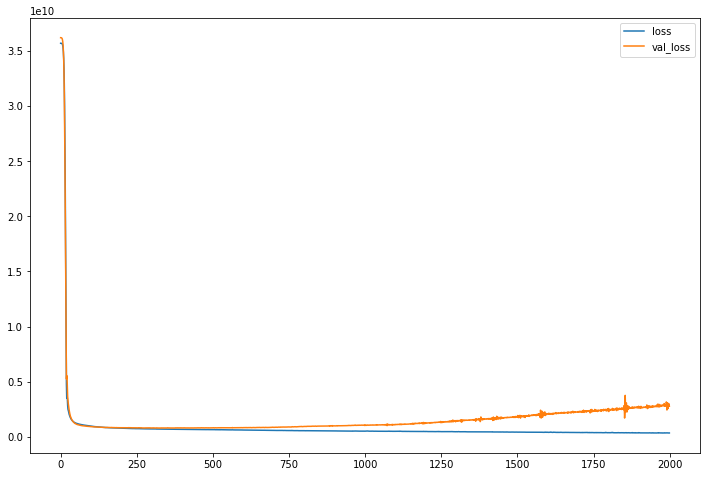

In [26]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(figsize=(12,8))

In [27]:
y_pred = model.predict(X_test)

In [28]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 22589.894120288773
MSE: 2773059080.931071
RMSE: 52659.84315330868


# Keras Classifier 

In [29]:
from keras.wrappers.scikit_learn import KerasClassifier

keras_classifier = KerasClassifier(build_model, epochs = 1000)

keras_classifier.fit(X_train, y_train)


Epoch 1/1000
30/30 [==============================] - 0s 2ms/step - loss: 48730.1875
Epoch 2/1000
30/30 [==============================] - 0s 2ms/step - loss: 10594.9316
Epoch 3/1000
30/30 [==============================] - 0s 2ms/step - loss: 4991.1699
Epoch 4/1000
30/30 [==============================] - 0s 2ms/step - loss: 3829.6353
Epoch 5/1000
30/30 [==============================] - 0s 2ms/step - loss: 3344.2778
Epoch 6/1000
30/30 [==============================] - 0s 2ms/step - loss: 3067.7170
Epoch 7/1000
30/30 [==============================] - 0s 2ms/step - loss: 3005.7361
Epoch 8/1000
30/30 [==============================] - 0s 2ms/step - loss: 2796.0500
Epoch 9/1000
30/30 [==============================] - 0s 2ms/step - loss: 2739.6323
Epoch 10/1000
30/30 [==============================] - 0s 2ms/step - loss: 2538.9434
Epoch 11/1000
30/30 [==============================] - 0s 2ms/step - loss: 2466.9019
Epoch 12/1000
30/30 [==============================] - 0s 2ms/step - los

30/30 [==============================] - 0s 3ms/step - loss: 1307.9434
Epoch 98/1000
30/30 [==============================] - 0s 2ms/step - loss: 1225.4683
Epoch 99/1000
30/30 [==============================] - 0s 3ms/step - loss: 1229.3005
Epoch 100/1000
30/30 [==============================] - 0s 3ms/step - loss: 1171.5939
Epoch 101/1000
30/30 [==============================] - 0s 4ms/step - loss: 1201.9886
Epoch 102/1000
30/30 [==============================] - 0s 3ms/step - loss: 1166.7314
Epoch 103/1000
30/30 [==============================] - 0s 2ms/step - loss: 1165.5706
Epoch 104/1000
30/30 [==============================] - 0s 2ms/step - loss: 1187.4784
Epoch 105/1000
30/30 [==============================] - 0s 2ms/step - loss: 1460.3512
Epoch 106/1000
30/30 [==============================] - 0s 2ms/step - loss: 1215.4583
Epoch 107/1000
30/30 [==============================] - 0s 3ms/step - loss: 1167.4453
Epoch 108/1000
30/30 [==============================] - 0s 2ms/step - l

30/30 [==============================] - 0s 2ms/step - loss: 756.3073
Epoch 193/1000
30/30 [==============================] - 0s 2ms/step - loss: 728.5278
Epoch 194/1000
30/30 [==============================] - 0s 2ms/step - loss: 743.6916
Epoch 195/1000
30/30 [==============================] - 0s 2ms/step - loss: 880.5027
Epoch 196/1000
30/30 [==============================] - 0s 2ms/step - loss: 893.7119
Epoch 197/1000
30/30 [==============================] - 0s 2ms/step - loss: 744.2487
Epoch 198/1000
30/30 [==============================] - 0s 2ms/step - loss: 751.7947
Epoch 199/1000
30/30 [==============================] - 0s 2ms/step - loss: 711.6445
Epoch 200/1000
30/30 [==============================] - 0s 2ms/step - loss: 728.5785
Epoch 201/1000
30/30 [==============================] - 0s 2ms/step - loss: 693.6451
Epoch 202/1000
30/30 [==============================] - 0s 2ms/step - loss: 681.4822
Epoch 203/1000
30/30 [==============================] - 0s 2ms/step - loss: 663.

30/30 [==============================] - 0s 2ms/step - loss: 513.2401
Epoch 289/1000
30/30 [==============================] - 0s 2ms/step - loss: 470.2400
Epoch 290/1000
30/30 [==============================] - 0s 2ms/step - loss: 451.9106
Epoch 291/1000
30/30 [==============================] - 0s 2ms/step - loss: 516.3569
Epoch 292/1000
30/30 [==============================] - 0s 2ms/step - loss: 623.1112
Epoch 293/1000
30/30 [==============================] - 0s 2ms/step - loss: 516.3948
Epoch 294/1000
30/30 [==============================] - 0s 2ms/step - loss: 540.0511
Epoch 295/1000
30/30 [==============================] - 0s 2ms/step - loss: 510.4212
Epoch 296/1000
30/30 [==============================] - 0s 2ms/step - loss: 424.4661
Epoch 297/1000
30/30 [==============================] - 0s 2ms/step - loss: 493.6798
Epoch 298/1000
30/30 [==============================] - 0s 2ms/step - loss: 461.8377
Epoch 299/1000
30/30 [==============================] - 0s 2ms/step - loss: 478.

30/30 [==============================] - 0s 2ms/step - loss: 317.2902
Epoch 385/1000
30/30 [==============================] - 0s 2ms/step - loss: 311.8662
Epoch 386/1000
30/30 [==============================] - 0s 2ms/step - loss: 362.5244
Epoch 387/1000
30/30 [==============================] - 0s 2ms/step - loss: 296.2649
Epoch 388/1000
30/30 [==============================] - 0s 2ms/step - loss: 303.1015
Epoch 389/1000
30/30 [==============================] - 0s 2ms/step - loss: 326.9795
Epoch 390/1000
30/30 [==============================] - 0s 2ms/step - loss: 303.1193
Epoch 391/1000
30/30 [==============================] - 0s 2ms/step - loss: 338.0527
Epoch 392/1000
30/30 [==============================] - 0s 2ms/step - loss: 312.6006
Epoch 393/1000
30/30 [==============================] - 0s 2ms/step - loss: 335.3364
Epoch 394/1000
30/30 [==============================] - 0s 2ms/step - loss: 339.3507
Epoch 395/1000
30/30 [==============================] - 0s 2ms/step - loss: 306.

30/30 [==============================] - 0s 2ms/step - loss: 363.5099
Epoch 481/1000
30/30 [==============================] - 0s 2ms/step - loss: 356.1685
Epoch 482/1000
30/30 [==============================] - 0s 2ms/step - loss: 260.0811
Epoch 483/1000
30/30 [==============================] - 0s 2ms/step - loss: 277.5140
Epoch 484/1000
30/30 [==============================] - 0s 2ms/step - loss: 211.1325
Epoch 485/1000
30/30 [==============================] - 0s 2ms/step - loss: 196.1190
Epoch 486/1000
30/30 [==============================] - 0s 2ms/step - loss: 262.3804
Epoch 487/1000
30/30 [==============================] - 0s 2ms/step - loss: 229.4091
Epoch 488/1000
30/30 [==============================] - 0s 2ms/step - loss: 245.1958
Epoch 489/1000
30/30 [==============================] - 0s 2ms/step - loss: 225.3137
Epoch 490/1000
30/30 [==============================] - 0s 2ms/step - loss: 263.6063
Epoch 491/1000
30/30 [==============================] - 0s 2ms/step - loss: 209.

30/30 [==============================] - 0s 2ms/step - loss: 189.3365
Epoch 577/1000
30/30 [==============================] - 0s 2ms/step - loss: 156.6659
Epoch 578/1000
30/30 [==============================] - 0s 2ms/step - loss: 165.0186
Epoch 579/1000
30/30 [==============================] - 0s 2ms/step - loss: 178.0891
Epoch 580/1000
30/30 [==============================] - 0s 2ms/step - loss: 181.3513
Epoch 581/1000
30/30 [==============================] - 0s 2ms/step - loss: 206.4381
Epoch 582/1000
30/30 [==============================] - 0s 2ms/step - loss: 158.2881
Epoch 583/1000
30/30 [==============================] - 0s 2ms/step - loss: 146.0322
Epoch 584/1000
30/30 [==============================] - 0s 2ms/step - loss: 179.0632
Epoch 585/1000
30/30 [==============================] - 0s 2ms/step - loss: 203.6677
Epoch 586/1000
30/30 [==============================] - 0s 2ms/step - loss: 215.8622
Epoch 587/1000
30/30 [==============================] - 0s 2ms/step - loss: 230.

30/30 [==============================] - 0s 2ms/step - loss: 162.4653
Epoch 673/1000
30/30 [==============================] - 0s 2ms/step - loss: 146.0825
Epoch 674/1000
30/30 [==============================] - 0s 2ms/step - loss: 129.0039
Epoch 675/1000
30/30 [==============================] - 0s 2ms/step - loss: 130.8458
Epoch 676/1000
30/30 [==============================] - 0s 2ms/step - loss: 135.1819
Epoch 677/1000
30/30 [==============================] - 0s 2ms/step - loss: 131.0816
Epoch 678/1000
30/30 [==============================] - 0s 2ms/step - loss: 121.7630
Epoch 679/1000
30/30 [==============================] - 0s 2ms/step - loss: 147.1849
Epoch 680/1000
30/30 [==============================] - 0s 2ms/step - loss: 156.4520
Epoch 681/1000
30/30 [==============================] - 0s 2ms/step - loss: 151.6158
Epoch 682/1000
30/30 [==============================] - 0s 2ms/step - loss: 198.4880
Epoch 683/1000
30/30 [==============================] - 0s 2ms/step - loss: 196.

30/30 [==============================] - 0s 2ms/step - loss: 161.6592
Epoch 769/1000
30/30 [==============================] - 0s 2ms/step - loss: 156.4363
Epoch 770/1000
30/30 [==============================] - 0s 2ms/step - loss: 157.7270
Epoch 771/1000
30/30 [==============================] - 0s 2ms/step - loss: 144.6083
Epoch 772/1000
30/30 [==============================] - 0s 2ms/step - loss: 146.0936
Epoch 773/1000
30/30 [==============================] - 0s 2ms/step - loss: 111.7628
Epoch 774/1000
30/30 [==============================] - 0s 2ms/step - loss: 99.6957
Epoch 775/1000
30/30 [==============================] - 0s 2ms/step - loss: 122.8343
Epoch 776/1000
30/30 [==============================] - 0s 2ms/step - loss: 137.6966
Epoch 777/1000
30/30 [==============================] - 0s 2ms/step - loss: 126.8049
Epoch 778/1000
30/30 [==============================] - 0s 2ms/step - loss: 146.2231
Epoch 779/1000
30/30 [==============================] - 0s 2ms/step - loss: 137.3

30/30 [==============================] - 0s 2ms/step - loss: 133.6095
Epoch 865/1000
30/30 [==============================] - 0s 2ms/step - loss: 142.5835
Epoch 866/1000
30/30 [==============================] - 0s 2ms/step - loss: 140.0866
Epoch 867/1000
30/30 [==============================] - 0s 2ms/step - loss: 112.0363
Epoch 868/1000
30/30 [==============================] - 0s 2ms/step - loss: 127.3135
Epoch 869/1000
30/30 [==============================] - 0s 2ms/step - loss: 112.2871
Epoch 870/1000
30/30 [==============================] - 0s 2ms/step - loss: 101.0466
Epoch 871/1000
30/30 [==============================] - 0s 2ms/step - loss: 113.4815
Epoch 872/1000
30/30 [==============================] - 0s 2ms/step - loss: 131.2722
Epoch 873/1000
30/30 [==============================] - 0s 2ms/step - loss: 135.9099
Epoch 874/1000
30/30 [==============================] - 0s 2ms/step - loss: 136.5183
Epoch 875/1000
30/30 [==============================] - 0s 2ms/step - loss: 137.

30/30 [==============================] - 0s 2ms/step - loss: 87.0128
Epoch 961/1000
30/30 [==============================] - 0s 2ms/step - loss: 115.2180
Epoch 962/1000
30/30 [==============================] - 0s 2ms/step - loss: 87.5733
Epoch 963/1000
30/30 [==============================] - 0s 2ms/step - loss: 96.9214
Epoch 964/1000
30/30 [==============================] - 0s 2ms/step - loss: 79.1727
Epoch 965/1000
30/30 [==============================] - 0s 2ms/step - loss: 89.1731
Epoch 966/1000
30/30 [==============================] - 0s 2ms/step - loss: 94.3948
Epoch 967/1000
30/30 [==============================] - 0s 2ms/step - loss: 109.7278
Epoch 968/1000
30/30 [==============================] - 0s 2ms/step - loss: 147.6734
Epoch 969/1000
30/30 [==============================] - 0s 2ms/step - loss: 184.4996
Epoch 970/1000
30/30 [==============================] - 0s 2ms/step - loss: 236.5488
Epoch 971/1000
30/30 [==============================] - 0s 2ms/step - loss: 134.1815
E

In [30]:
y_pred = keras_classifier.predict(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [31]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 141666.81561822127
MSE: 24967881299.214752
RMSE: 158012.28211507722


# Regression using categorical values 

first step now is to code this categorical values to an understandable values for our models

In [32]:
f = ['MSZoning','SaleCondition']

MSZoning = preprocessing.LabelEncoder()
MSZoning.fit(['RL', 'RM', 'C (all)', 'FV', 'RH'])
data1['MSZoning'] = MSZoning.transform(data1['MSZoning'])


SaleCondition = preprocessing.LabelEncoder()
SaleCondition.fit(['Normal' ,'Abnorml' ,'Partial' ,'AdjLand' ,'Alloca' ,'Family'])
data1['SaleCondition'] = SaleCondition.transform(data1['SaleCondition'])


In [33]:
X1 = data1[f]
y = data1['SalePrice']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.33, random_state=101)

In [34]:
Linear_Regression1 = LinearRegression()
Linear_Regression1.fit(X_train, y_train)

LinearRegression()

In [35]:
y_pred = Linear_Regression1.predict(X_test)


In [36]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))

MAE: 49140.83099966604
MSE: 4327325362.298329
RMSE: 65782.4092162816
VarScore: 0.1167307054016149
